In [4]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [5]:
dataset_dir = 'E:\Internship'


In [6]:
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'test')

IMG_SIZE = 150

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='categorical'
)

Found 16854 images belonging to 1 classes.
Found 5641 images belonging to 1 classes.


In [7]:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [5]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/30
526/526 [==============================] - 677s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/30
526/526 [==============================] - 710s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/30
526/526 [==============================] - 438s 832ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/30
526/526 [==============================] - 447s 850ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/30
526/526 [==============================] - 449s 853ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/30
526/526 [==============================] - 446s 848ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/30
526/526 [==============================] - 449s 853ms/step - loss: 0.00

In [6]:
model.save('fruit_recognition_model.h5')

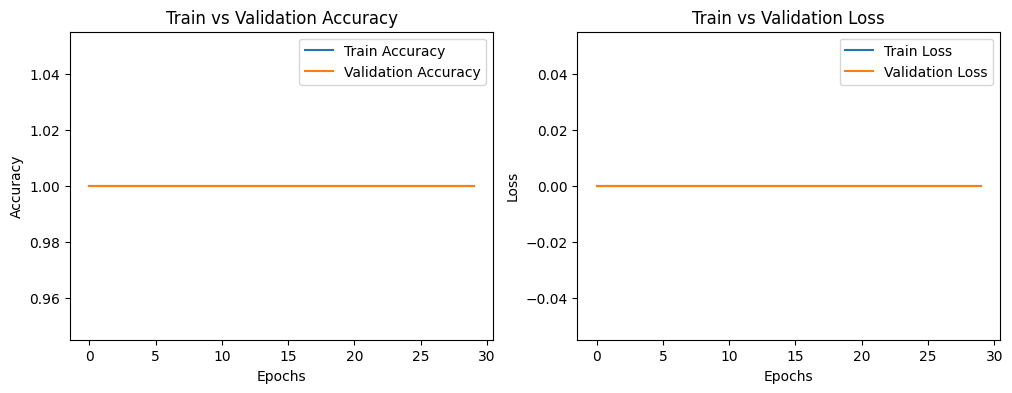

177/177 [==============================] - 34s 192ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Accuracy: 100.00%


In [7]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


In [3]:
from tensorflow.keras.models import load_model

history = load_model('fruit_recognition_model.h5')


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

model = load_model('fruit_recognition_model.h5')

# test_datagen = ImageDataGenerator(rescale=1.0/255.0)
# test_generator = test_datagen.flow_from_directory(
#    r'E:\Internship\test',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical',
#     shuffle=False
# )

# test_loss, test_acc = model.evaluate(test_generator)
# print(f'Test Loss: {test_loss:.4f}')
# print(f'Test Accuracy: {test_acc * 100:.2f}%')

img_path = r'E:\Internship\test\test\0010.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = prediction.argmax(axis=1)

classes = ['Class 1', 'Class 2', 'Class 3']
plt.imshow(img)
plt.title(f'Predicted: {classes[predicted_class[0]]}')
plt.axis('off')
plt.show()


ValueError: in user code:

    File "C:\Users\Monisha Sarai\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Monisha Sarai\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Monisha Sarai\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Monisha Sarai\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
        return self(x, training=False)
    File "C:\Users\Monisha Sarai\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Monisha Sarai\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\input_spec.py", line 296, in assert_input_compatibility
        f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 150, 150, 3), found shape=(None, 224, 224, 3)


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

model = load_model('fruit_recognition_model.h5')

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
     r'E:\Internship\test\test\0010.jpg',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc * 100:.2f}%')

img_path = 'path_to_test_image.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = prediction.argmax(axis=1)

classes = list(test_generator.class_indices.keys())
plt.imshow(img)
plt.title(f'Predicted: {classes[predicted_class[0]]}')
plt.axis('off')
plt.show()


NotADirectoryError: [WinError 267] The directory name is invalid: 'E:\\Internship\\test\\test\\0010.jpg'

1/1 [==============================] - 0s 201ms/step
Predicted Class: train
Confidence: 1.0000


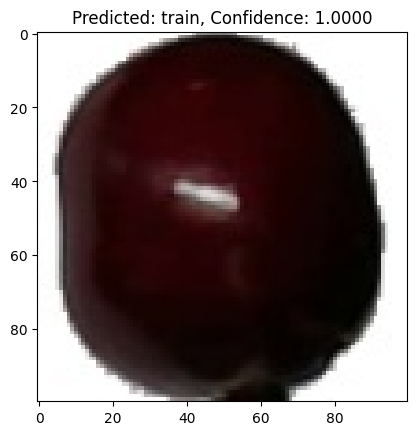

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('fruit_recognition_model.h5')

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    class_labels = list(train_generator.class_indices.keys())
    predicted_class_name = class_labels[predicted_class[0]]
    return predicted_class_name, predictions[0][predicted_class[0]]

img_path = r"E:\Internship\test\test\0025.jpg"

predicted_class_name, confidence = predict_image(img_path)

print(f"Predicted Class: {predicted_class_name}")
print(f"Confidence: {confidence:.4f}")

img = image.load_img(img_path)
plt.imshow(img)
plt.title(f"Predicted: {predicted_class_name}, Confidence: {confidence:.4f}")
plt.show()
